In [3]:
import pandas as pd

In [3]:
# Check version of pandas being used
pd.__version__

'2.2.3'

In [4]:
# Q1. Downloading the data
# We'll use the same NYC taxi dataset [https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page], but instead of "Green Taxi Trip Records", 
# we'll use "Yellow Taxi Trip Records".

# Download the data for January and February 2023.

# Read the data for January. How many columns are there?

# 16
# 17
# 18
# 19

In [5]:
# Copy the dataset link from the link and read in as a dataframe

In [ ]:
# df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-01.parquet')

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [ ]:
# Import error since there is no way for the notebook to read in a parquet file. Need to install pyarrow
# Same command can be used in terminal, except for the !, which is needed in the notebook

In [4]:
!pip install pyarrow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
# Try creating the df again after installing pyarrow

In [5]:
# Read in data and create dataframe for January 2023
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [4]:
# Check that the dataset has been read in correctly
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
import sklearn

In [ ]:
sklearn.__version__

'1.6.1'

In [6]:
# To find how many columns in the dataframe, can use shape to get rows and columns
df.shape

(3066766, 19)

In [ ]:
# There are 19 columns in January 2023 dataset.

In [ ]:
# Q2. Computing duration
# Now let's compute the duration variable. It should contain the duration of a ride in minutes.

# What's the standard deviation of the trips duration in January?

# 32.59
# 42.59
# 52.59
# 62.59

For explanation of converting the timedelta to a useable target variable, see
https://www.youtube.com/watch?v=iRunifGSHFc
Timestamp: 7:45

In [7]:
# duration value assigned as duration
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

We will end up with a timedelta datatype which isn't really useable.
The target variable we would want is duration in minutes.

In [8]:
# Take the first value of the duration column - called td for timedelta - and convert it to seconds
td = df.duration.iloc[0]

In [9]:
# With the timedelta object, we can use the total_seconds() method to get the duration in seconds
# Convert to seconds
td.total_seconds()


506.0

In [10]:
# Convert to minutes
td.total_seconds() / 60

8.433333333333334

Since we need to apply this timedelta change into minutes for every element of the duration column, we can use the apply function in pandas and a lambda function to do that.

In [ ]:
# Now we can apply the same function to the entire column
# df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

0           8.433333
1           6.316667
2          12.750000
3           9.616667
4          10.833333
             ...    
3066761    13.983333
3066762    19.450000
3066763    24.516667
3066764    13.000000
3066765    14.400000
Name: duration, Length: 3066766, dtype: float64

In [12]:
# Setting it to df.duration sets the value back to the duration column
# Now we can apply the same function to the entire column to convert duration to minutes
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [13]:
# Check the standard deviation of the duration column
df.duration.std()

np.float64(42.59435124195458)

In [ ]:
# The standard deviation of the trips duration in January is 42.59 minutes.

In [ ]:
# Q3. Dropping outliers
# Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

# What fraction of the records left after you dropped the outliers?

# 90%
# 92%
# 95%
# 98%

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_25104/1886757694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


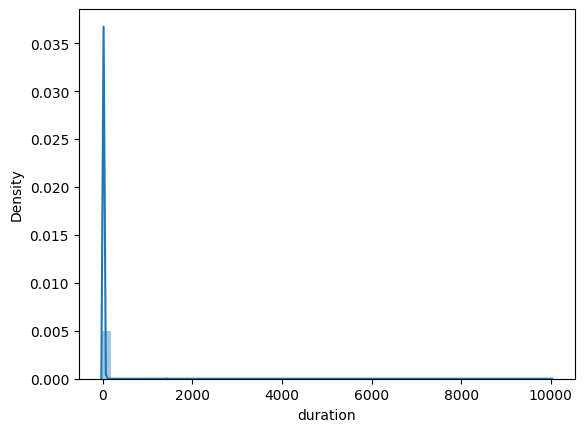

In [15]:
sns.distplot(df.duration)
plt.show()

The distribution shows a very long tail.
The distribution is right-skewed. 
We can see that there are some outliers. 
Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

In [16]:
df.duration.describe().round(3)

count    3066766.000
mean          15.669
std           42.594
min          -29.200
25%            7.117
50%           11.517
75%           18.300
max        10029.183
Name: duration, dtype: float64

In [25]:
10029/60

167.15

In [23]:
# We can use the describe function to get the 95th, 98th and 99th percentiles
df.duration.describe(percentiles=[0.95,0.98,0.99, 0.995, 0.998, 0.999]).round(3)

count    3066766.000
mean          15.669
std           42.594
min          -29.200
50%           11.517
95%           36.467
98%           48.733
99%           57.250
99.5%         65.517
99.8%         79.400
99.9%        175.822
max        10029.183
Name: duration, dtype: float64

In [ ]:
# ((df.duration >= 1) & (df.duration <= 60)).describe(percentiles=[0.95,0.98,0.99]).round(3)


count     3009173
unique          1
top          True
freq      3009173
Name: duration, dtype: object

In [24]:
# no_ouliers_df = ((df.duration >= 1) & (df.duration <= 60))
# We need to add df. to the front of the condition in order to get the correct dataframe or else it will just return a boolean value
# no_ouliers_df
no_ouliers_df = df[((df.duration >= 1) & (df.duration <= 80))]
no_ouliers_df.duration.describe(percentiles=[0.95,0.98,0.99]).round(3)

count    3027472.000
mean          14.523
std           10.725
min            1.000
50%           11.617
95%           36.133
98%           47.683
99%           55.250
max           80.000
Name: duration, dtype: float64

In [18]:
# We take account only for duration from 1 to 60 minutes, since most are in this range
df = df[(df.duration >= 1) & (df.duration <= 60)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


In [34]:
df.duration.describe().round(3)

count    3009173.000
mean          14.205
std            9.939
min            1.000
25%            7.217
50%           11.550
75%           18.183
max           60.000
Name: duration, dtype: float64

In [ ]:
# Q4. One-hot encoding
# Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

# Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
# Fit a dictionary vectorizer
# Get a feature matrix from it
# What's the dimensionality of this matrix (number of columns)?

# 2
# 155
# 345
# 515
# 715

In [35]:
# Need to set categorical features
categorical = ['PULocationID', 'DOLocationID']
# Need to set numeric features
numerical = ['trip_distance']

For One Hot Encoding, we can use something like Dictionary Vectorizer.
Dictionary Vectorizer treats everything that isn't a number as a categorical variable.

In [31]:
df[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

Since the categorical variables here are numbers, it will not try to do one hot encoding.
So we need to turn it into a string.
In Pandas, dtype of object means strings.

In [32]:
# Need to turn the categorical features into strings
df[categorical] = df[categorical].astype(str)
# Check the dtypes again
df[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [33]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [ ]:
from sklearn.feature_extraction import DictVectorizer
# Create a dictionary vectorizer
dv = DictVectorizer()

In [36]:
df[categorical + numerical].head()

,PULocationID,DOLocationID,trip_distance
0,161,141,0.97
1,43,237,1.10
2,48,238,2.51
3,138,7,1.90
4,107,79,1.43


In [ ]:
# We need to convert the dataframe to a list of dictionaries
# We can use the to_dict method to convert the dataframe to a list of dictionaries
# We need to set the orient parameter to records to get a list of dictionaries
# Each of the dictionaries will be a row in the dataframe
df[categorical + numerical].to_dict(orient='records')

[{'PULocationID': '161', 'DOLocationID': '141', 'trip_distance': 0.97},
 {'PULocationID': '43', 'DOLocationID': '237', 'trip_distance': 1.1},
 {'PULocationID': '48', 'DOLocationID': '238', 'trip_distance': 2.51},
 {'PULocationID': '138', 'DOLocationID': '7', 'trip_distance': 1.9},
 {'PULocationID': '107', 'DOLocationID': '79', 'trip_distance': 1.43},
 {'PULocationID': '161', 'DOLocationID': '137', 'trip_distance': 1.84},
 {'PULocationID': '239', 'DOLocationID': '143', 'trip_distance': 1.66},
 {'PULocationID': '142', 'DOLocationID': '200', 'trip_distance': 11.7},
 {'PULocationID': '164', 'DOLocationID': '236', 'trip_distance': 2.95},
 {'PULocationID': '141', 'DOLocationID': '107', 'trip_distance': 3.01},
 {'PULocationID': '234', 'DOLocationID': '68', 'trip_distance': 1.8},
 {'PULocationID': '79', 'DOLocationID': '264', 'trip_distance': 7.3},
 {'PULocationID': '164', 'DOLocationID': '143', 'trip_distance': 3.23},
 {'PULocationID': '138', 'DOLocationID': '33', 'trip_distance': 11.43},
 {'

In [ ]:
# Q5. Training a model
# Now let's use the feature matrix from the previous step to train a model.

# Train a plain linear regression model with default parameters, where duration is the response variable
# Calculate the RMSE of the model on the training data
# What's the RMSE on train?

# 3.64
# 7.64
# 11.64
# 16.64

In [ ]:
# Q6. Evaluating the model
# Now let's apply this model to the validation dataset (February 2023).

# What's the RMSE on validation?

# 3.81
# 7.81
# 11.81
# 16.81